# **Project Name -**  SMS spam detector


## **Project Summary :**

### **Objective:**<br>
The SMS Spam Detection project aims to develop a reliable and accurate system to automatically identify and filter out spam messages from legitimate SMS communications. With the rise in spam messages, which often contain phishing links, scams, and advertisements, this project seeks to enhance SMS communication by preventing spam from reaching end users.


### **Project Overview**
1.**Problem Definition:**<br>
Spam messages are unsolicited, often malicious messages that disrupt user experience and can compromise data security.
The goal is to create a machine learning model capable of classifying messages as "spam" or "ham" (non-spam) to reduce spam-related issues for users.<br>
2.**DataSet:**<br>
The model uses a labeled SMS dataset containing a collection of messages tagged as "spam" or "ham".
Key features of the dataset include text content, length of the message, word frequency, and presence of keywords commonly associated with spam.<br>
3.**Procedure:**<br>
*Data Preprocessing:* Cleaning the text data by removing stop words, punctuation, and performing stemming/lemmatization.<br>
*Feature Extraction:* Extracting relevant features from the text, such as words that are found in majority of spam messages.<br>
*Model Selection:* Employing a range of machine learning algorithms to train and evaluate the spam detection model. These models included decision trees, support vector machines, and more.<br>
*Evaluation:* Using accuracy, precision, recall, and F1-score to measure model performance, with a focus on minimizing false positives (misclassifying ham as spam).<br>
*Tuning and Optimization:* Fine-tuning hyperparameters and optimizing the model was a critical step to enhance its predictive accuracy.<br>
*Validation:* Rigorous cross-validation and validation on a test dataset were performed to verify the model's ability to generalize to new, unseen data.<br>


## ***Coding!!***

In [1]:
# importing Libraries
# importing numpy and pandas for data manipulation and analysis
import numpy as np 
import pandas as pd 

# importing sklearn for reading data, manipulating and working on it.
from sklearn.model_selection import train_test_split #to split the data
from sklearn.linear_model import LogisticRegression #used for classification
from sklearn.feature_extraction.text import TfidfVectorizer #text processing
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS


# Importing the Pipeline class from scikit-learn
from sklearn.pipeline import Pipeline

# Libraries for ML Model implementation
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Natural language Toolkit for text processing
import nltk 
from nltk.stem  import PorterStemmer
from nltk.corpus import stopwords

# String for excluding special characters and punctuations
import string 




In [2]:
# loading dataset
df = pd.read_csv("sms-spam.csv")


In [3]:
# Dataset first look
# View first 5 rows of the dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# Count number of rows and columns in dataset using shape
print("Number of rows: ",df.shape[0])
print("Number of columns: ",df.shape[1])

Number of rows:  5572
Number of columns:  5


In [5]:
# Data set informations
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
df


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
# Duplicate values
dupli = df.duplicated().sum()
print(f'number of duplicated rows are {dupli}')

number of duplicated rows are 403


In [8]:
# There are 403 duplicated rows
# Remove the duplicated rows
if(df.duplicated().sum() != 0): df=df.drop_duplicates(keep='first')
dup=df.duplicated().sum()
print(f'number of duplicated rows {dup}')
print('number of rows: ',df.shape[0])

number of duplicated rows 0
number of rows:  5169


In [9]:
# Check if there is any null value
nul = df.isnull().sum()
print("number of null elements in the dataset: ",nul)

number of null elements in the dataset:  v1    0
v2    0
dtype: int64


In [10]:
# convert v1 to 1 for ham and 0 for spam
df['v1'] = df['v1'].map({'ham':0,'spam':1}) 
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# Distribution of spam vs ham
df['v1'].value_counts()

v1
0    4516
1     653
Name: count, dtype: int64

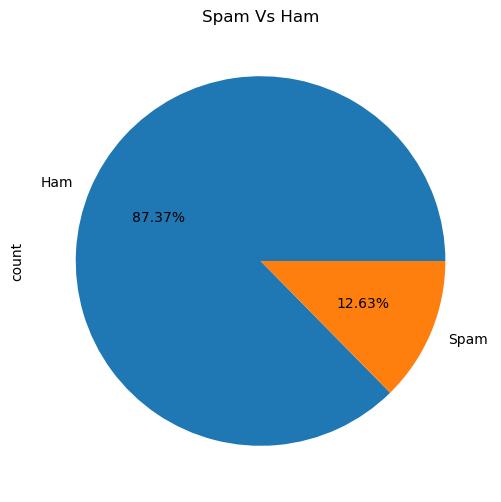

In [12]:
# Pie chart visualization for distribution of spam and ham messages
spread = df['v1'].value_counts()
plt.figure(figsize=(6,6))
spread.plot(kind='pie',autopct='%1.2f%%',y='category',labels=['Ham','Spam'])
plt.title(f'Spam Vs Ham')
plt.show()

In [13]:
# This is a highly imbalanced data
# now will be analysing the number of alphabets/words/sentences being used in the dataset
# for this, we will create 3 new columns: (1) no.of characters (2) no.of words (3) no.of sentences
# downloadin the dependencies
# punkt package includes pre-trained models for tokenizing text in many languages
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [14]:
# creating a new column with count of characters
df['no.of characters'] = df['v2'].apply(len)

# creating a new new column with count of words
df['no.of words'] = df['v2'].apply(lambda i:len(nltk.word_tokenize(i)))
# here 'word_tokenize' function takes a string of text as input and returns a list of words

# creating a new column with count of sentences
df['no.of sentences'] = df['v2'].apply(lambda i:len(nltk.sent_tokenize(i)))
# here 'sent_tokenize' function takes a string of text as input and returns a list of sentences

# displaying the edited dataset
df.head()

,v1,v2,no.of characters,no.of words,no.of sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [15]:
# describing the infomations
x = df[['no.of characters','no.of words','no.of sentences']].describe()
x

,no.of characters,no.of words,no.of sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [16]:
# calculating for ham messages
x = df[df['v1']==0][['no.of characters','no.of words','no.of sentences']].describe()
x

,no.of characters,no.of words,no.of sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [17]:
# calculating for spam messages
y = df[df['v1']==1][['no.of characters','no.of words','no.of sentences']].describe()
y

,no.of characters,no.of words,no.of sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


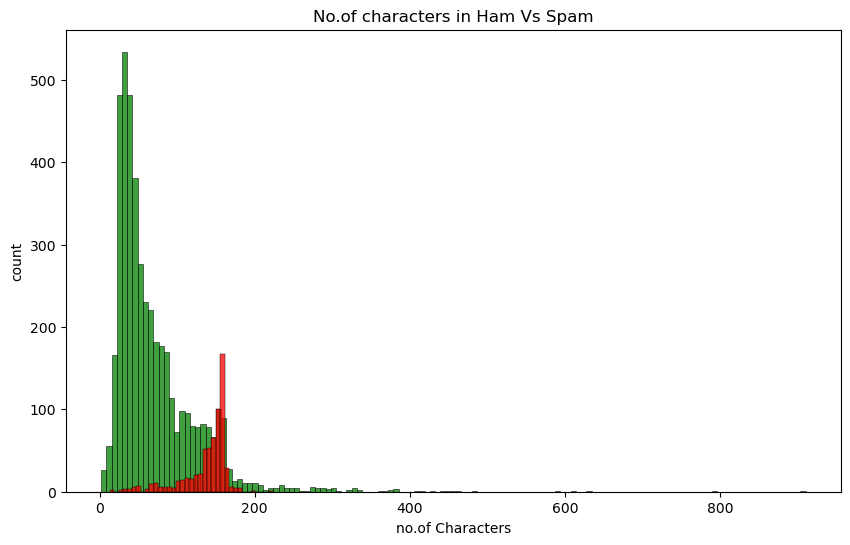

In [18]:
# for better visualization, we will plot a histogram using 'seaborn' 
# histogram for no.of characters
plt.figure(figsize=(10,6))
sns.histplot(df[df['v1']==0]['no.of characters'], color="green")
sns.histplot(df[df['v1']==1]['no.of characters'], color="red")
plt.title("No.of characters in Ham Vs Spam")
plt.xlabel('no.of Characters')
plt.ylabel('count')
plt.show()
# green -> Ham, yellow -> Spam

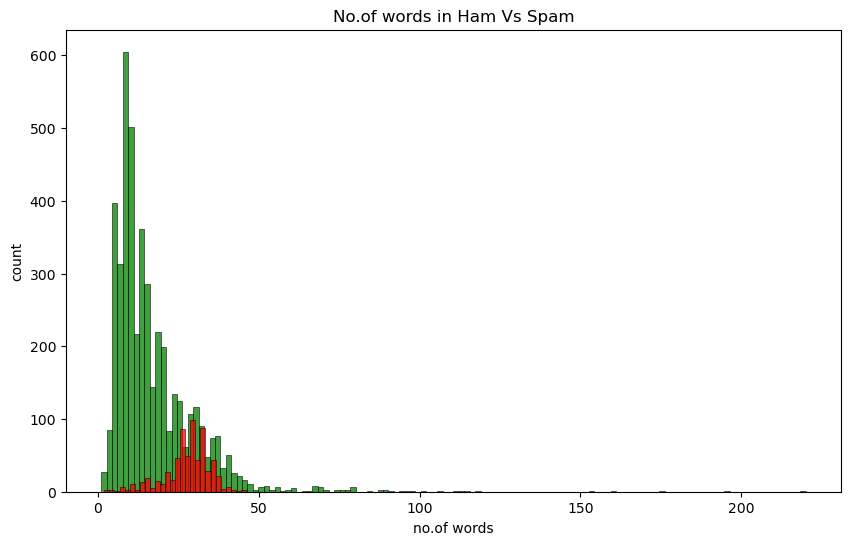

In [19]:
# for better visualization, we will plot a histogram using 'seaborn' 
# histogram for no.of words
plt.figure(figsize=(10,6))
sns.histplot(df[df['v1']==0]['no.of words'], color="green")
sns.histplot(df[df['v1']==1]['no.of words'], color="red")
plt.title("No.of words in Ham Vs Spam")
plt.xlabel('no.of words')
plt.ylabel('count')
plt.show()
# green -> Ham, yellow -> Spam

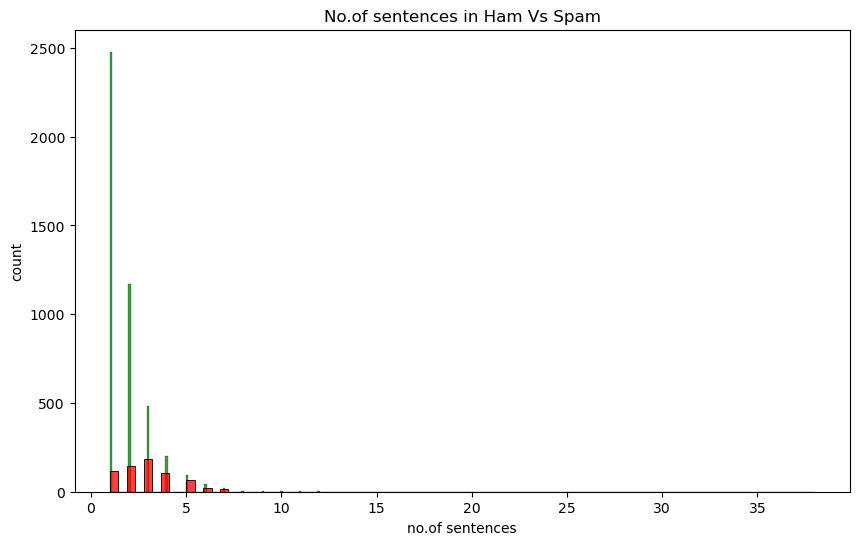

In [20]:
# for better visualization, we will plot a histogram using 'seaborn' 
# histogram for no.of sentences
plt.figure(figsize=(10,6))
sns.histplot(df[df['v1']==0]['no.of sentences'], color="green")
sns.histplot(df[df['v1']==1]['no.of sentences'], color="red")
plt.title("No.of sentences in Ham Vs Spam")
plt.xlabel('no.of sentences')
plt.ylabel('count')
plt.show()
# green -> Ham, yellow -> Spam

In [21]:
# observation : spam messages have more no.of words,sentences and characters

In [22]:
#sns.pairplot( df,hue='v1')
df['v1']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5169, dtype: int64

In [23]:
# finding pearson's correlation coefficient
print(df.corr(numeric_only=True))

                        v1  no.of characters  no.of words  no.of sentences
v1                1.000000          0.384717     0.262912         0.263939
no.of characters  0.384717          1.000000     0.965760         0.624139
no.of words       0.262912          0.965760     1.000000         0.679971
no.of sentences   0.263939          0.624139     0.679971         1.000000


<Axes: >

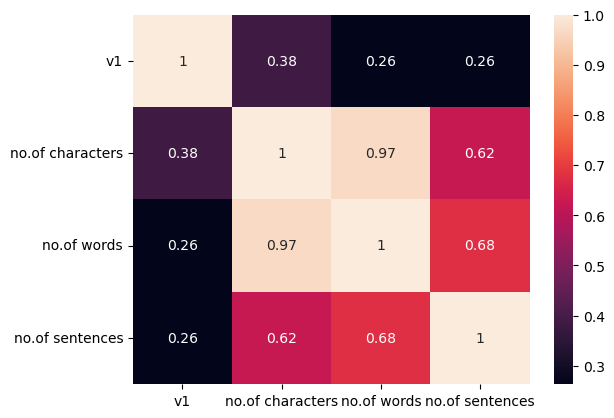

In [24]:
# converting it into a heatmap
sns.heatmap(df.corr(numeric_only=True),annot=True,)

In [25]:
#multi-collinearity in the dataset
#all new 3 columns are highly correlated with each other but no.of words is correlated more with the 'result' than any other column

In [26]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
def text_modifier(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    
    ps = PorterStemmer()

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)


In [28]:
# will create a new column to store the transformed text
df['modified'] = df['v2'].apply(text_modifier)

# edited dataframe
df.head()

,v1,v2,no.of characters,no.of words,no.of sentences,modified
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


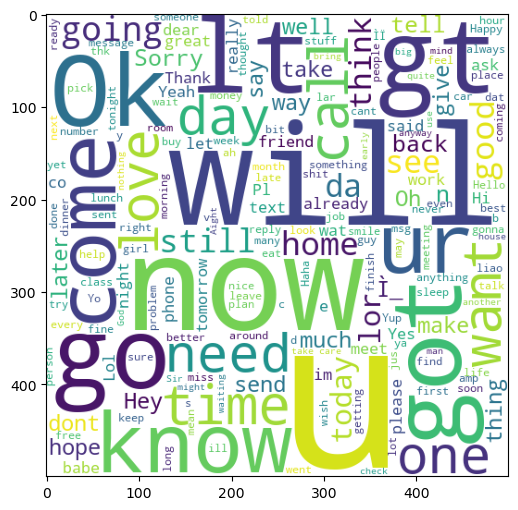

In [29]:
# creating wordcloud for data visualisation to display for frequently used words in spam messages.
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

# creating a  wordcloud for the spam messages
df_spam = wc.generate(df[df['v1']==0]['v2'].str.cat(sep=" "))

# creating figure and displaying 
plt.figure(figsize=(12,6))
plt.imshow(df_spam)

['Free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'FA', 'Cup', 'final', 'tkts', '21st', 'May', '2005.', 'Text', '87121', 'receive', 'question(std', 'txt', "rate)T&C's", 'apply', "08452810075over18's", 'FreeMsg', 'Hey', 'there', 'darling', "it's", 'been', '3', "week's", 'now', 'and', 'no', 'word', 'back!', "I'd", 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still?', 'Tb', 'ok!', 'XxX', 'std', 'chgs', 'send,', 'å£1.50', 'rcv', 'WINNER!!', 'As', 'valued', 'network', 'customer', 'have', 'selected', 'receivea', 'å£900', 'prize', 'reward!', 'To', 'claim', 'call', '09061701461.', 'Claim', 'code', 'KL341.', 'Valid', '12', 'hours', 'only.', 'Had', 'your', 'mobile', '11', 'months', 'or', 'more?', 'U', 'R', 'entitled', 'Update', 'the', 'latest', 'colour', 'mobiles', 'with', 'camera', 'Free!', 'Call', 'The', 'Mobile', 'Co', 'FREE', 'on', '08002986030', 'SIX', 'chances', 'CASH!', 'From', '100', '20,000', 'pounds', 'txt>', 'CSH11', 'send', '87575.', 'Cost', '150p/day,', '6days,', '

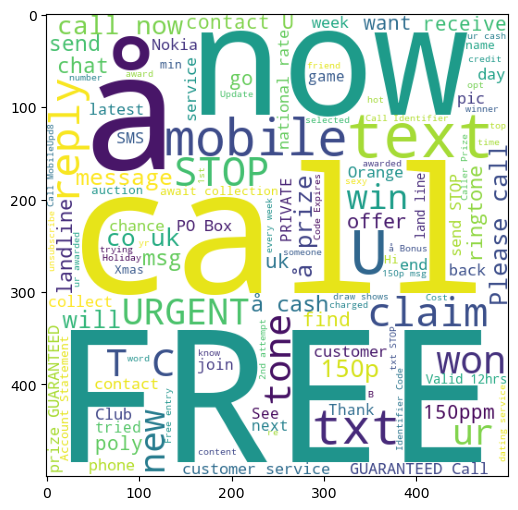

In [30]:
# creating wordcloud for data visualisation to display for frequently used words in spam messages.
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

# creating a  wordcloud for the spam messages
df_spam = wc.generate(df[df['v1']==1]['v2'].str.cat(sep=" "))

# creating a vocabulary to store spam word
vocabulary = []
corpus = []
for i in df[df['v1']==1]['v2']:
    for j in i.split():
        if(j not in vocabulary): vocabulary.append(j)
    if(i not in corpus): corpus.append(i)
print(vocabulary)
print(corpus)


# creating figure and displaying 
plt.figure(figsize=(12,6))
plt.imshow(df_spam)

In [31]:
# Model Classification
LR_model = LogisticRegression()
DT_model = DecisionTreeClassifier()
RF_model = RandomForestClassifier()
MNB_model = MultinomialNB() 
GNM_model = GaussianNB()
BNB_model = BernoulliNB()
KNC_model = KNeighborsClassifier()
ABC_model = AdaBoostClassifier()
BC_model = BaggingClassifier()
ETC_model = ExtraTreesClassifier()
GBC_model = GradientBoostingClassifier()
XGB_model = XGBClassifier()


In [32]:
# converting the collection of text into a matrix of token counts
cv = CountVectorizer()

# transforming the data of processed column 
X = cv.fit_transform(df['modified']).toarray()

# printing size of X
X.shape

(5169, 6708)

In [33]:
# storing the values of the v1 column
Y = df['v1'].values
Y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [70]:
# splitting the training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

0.9729206963249516
[[893   1]
 [ 27 113]]
0.9912280701754386


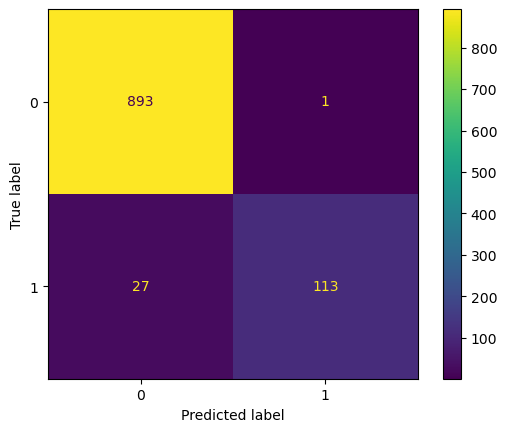

In [35]:
# training the dataset for Logistic Regression model
LR_model.fit(X_train,Y_train)
y_pred1 = LR_model.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))
conf_mat1 = confusion_matrix(Y_test,y_pred1)
cm_display1 = ConfusionMatrixDisplay(confusion_matrix=conf_mat1,display_labels=[0,1])
cm_display1.plot()
plt.show()

0.8655705996131529
[[773 121]
 [ 18 122]]
0.5020576131687243


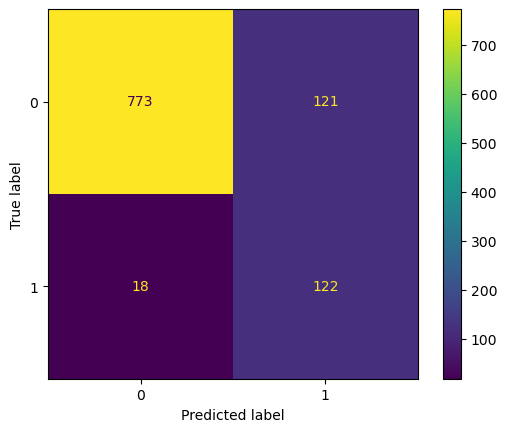

In [36]:
# training the dataset for GaussianNB
GNM_model.fit(X_train,Y_train)
y_pred1 = GNM_model.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))
conf_mat1 = confusion_matrix(Y_test,y_pred1)
cm_display1 = ConfusionMatrixDisplay(confusion_matrix=conf_mat1,display_labels=[0,1])
cm_display1.plot()
plt.show()

0.9690522243713733
[[892   2]
 [ 30 110]]
0.9821428571428571


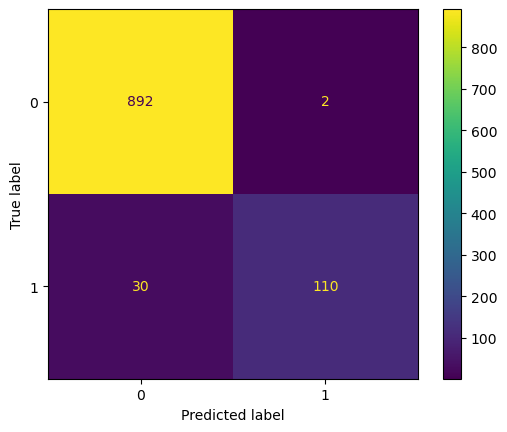

In [37]:
# training the dataset for BernoulliNB
BNB_model.fit(X_train,Y_train)
y_pred1 = BNB_model.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))
conf_mat1 = confusion_matrix(Y_test,y_pred1)
cm_display1 = ConfusionMatrixDisplay(confusion_matrix=conf_mat1,display_labels=[0,1])
cm_display1.plot()
plt.show()

0.9729206963249516
[[877  17]
 [ 11 129]]
0.8835616438356164


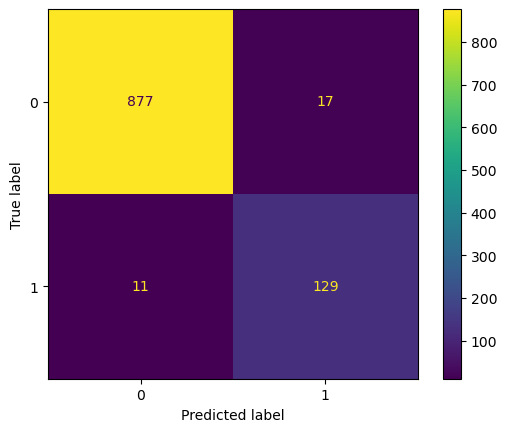

In [38]:
# training the dataset for MultinomialNB
MNB_model.fit(X_train,Y_train)
y_pred1 = MNB_model.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))
conf_mat1 = confusion_matrix(Y_test,y_pred1)
cm_display1 = ConfusionMatrixDisplay(confusion_matrix=conf_mat1,display_labels=[0,1])
cm_display1.plot()
plt.show()

0.9632495164410058
[[885   9]
 [ 29 111]]
0.925


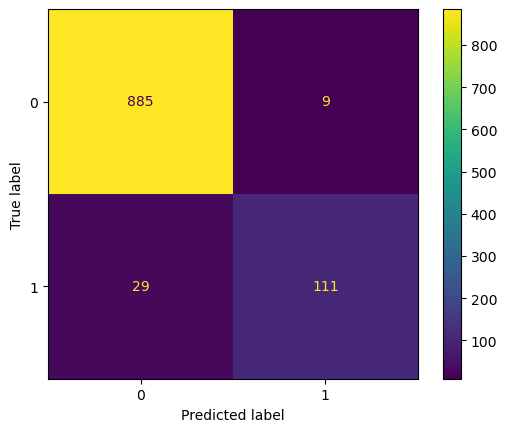

In [39]:
# training the dataset for DecisionTree classifier model
DT_model.fit(X_train,Y_train)
y_pred1 = DT_model.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))
conf_mat1 = confusion_matrix(Y_test,y_pred1)
cm_display1 = ConfusionMatrixDisplay(confusion_matrix=conf_mat1,display_labels=[0,1])
cm_display1.plot()
plt.show()

0.9632495164410058
[[894   0]
 [ 38 102]]
1.0


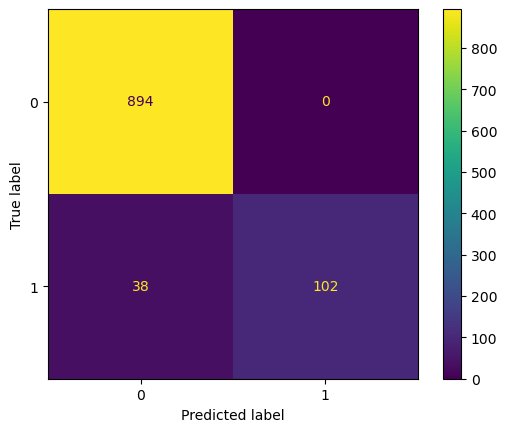

In [40]:
# training the dataset for RandomForest classifier model
RF_model.fit(X_train,Y_train)
y_pred1 = RF_model.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))
conf_mat1 = confusion_matrix(Y_test,y_pred1)
cm_display1 = ConfusionMatrixDisplay(confusion_matrix=conf_mat1,display_labels=[0,1])
cm_display1.plot()
plt.show()

0.9632495164410058
[[888   6]
 [ 32 108]]
0.9473684210526315


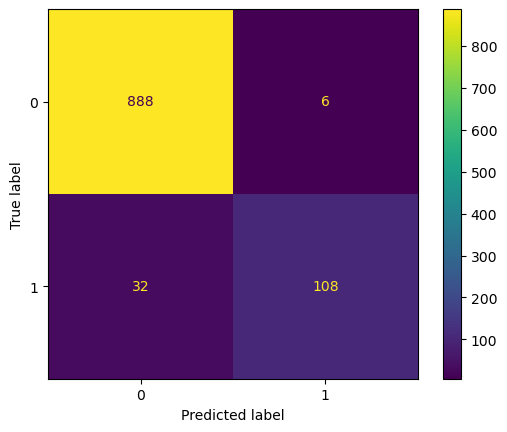

In [41]:
# training the dataset for Adaboost classifier model
ABC_model.fit(X_train,Y_train)
y_pred1 = ABC_model.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))
conf_mat1 = confusion_matrix(Y_test,y_pred1)
cm_display1 = ConfusionMatrixDisplay(confusion_matrix=conf_mat1,display_labels=[0,1])
cm_display1.plot()
plt.show()

0.9052224371373307
[[894   0]
 [ 98  42]]
1.0


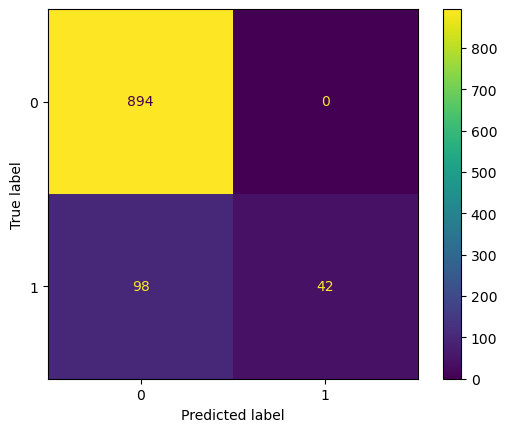

In [42]:
# training the dataset for KNeighbors classifier model
KNC_model.fit(X_train,Y_train)
y_pred1 = KNC_model.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))
conf_mat1 = confusion_matrix(Y_test,y_pred1)
cm_display1 = ConfusionMatrixDisplay(confusion_matrix=conf_mat1,display_labels=[0,1])
cm_display1.plot()
plt.show()

0.9622823984526112
[[891   3]
 [ 36 104]]
0.9719626168224299


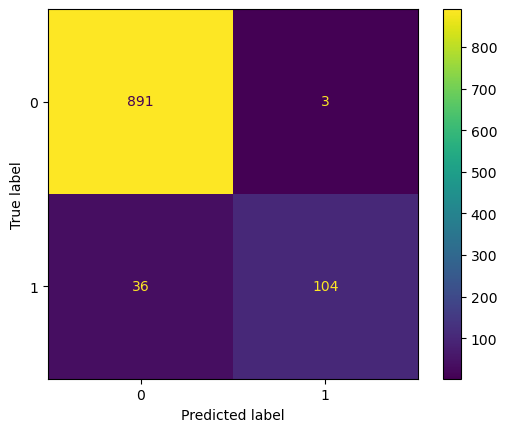

In [43]:
# training the dataset for Bagging classifier model
BC_model.fit(X_train,Y_train)
y_pred1 = BC_model.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))
conf_mat1 = confusion_matrix(Y_test,y_pred1)
cm_display1 = ConfusionMatrixDisplay(confusion_matrix=conf_mat1,display_labels=[0,1])
cm_display1.plot()
plt.show()

0.9700193423597679
[[894   0]
 [ 31 109]]
1.0


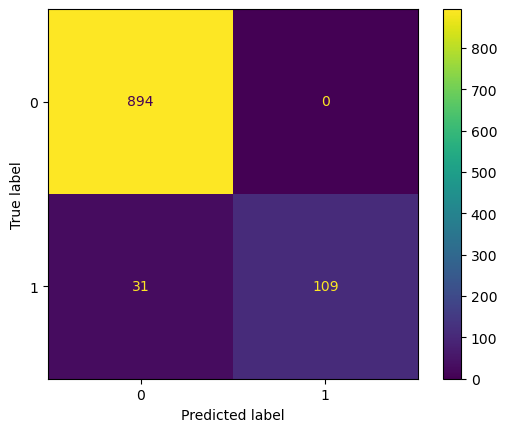

In [44]:
# training the dataset for ExtraTree classifier model
ETC_model.fit(X_train,Y_train)
y_pred1 = ETC_model.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))
conf_mat1 = confusion_matrix(Y_test,y_pred1)
cm_display1 = ConfusionMatrixDisplay(confusion_matrix=conf_mat1,display_labels=[0,1])
cm_display1.plot()
plt.show()

0.9535783365570599
[[893   1]
 [ 47  93]]
0.9893617021276596


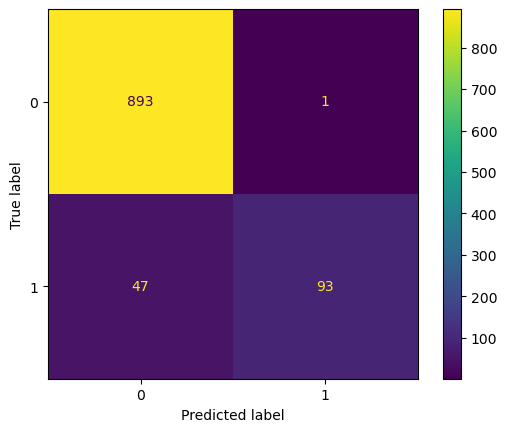

In [45]:
# training the dataset for GradientBoosting classifier model
GBC_model.fit(X_train,Y_train)
y_pred1 = GBC_model.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))
conf_mat1 = confusion_matrix(Y_test,y_pred1)
cm_display1 = ConfusionMatrixDisplay(confusion_matrix=conf_mat1,display_labels=[0,1])
cm_display1.plot()
plt.show()

0.9700193423597679
[[890   4]
 [ 27 113]]
0.9658119658119658


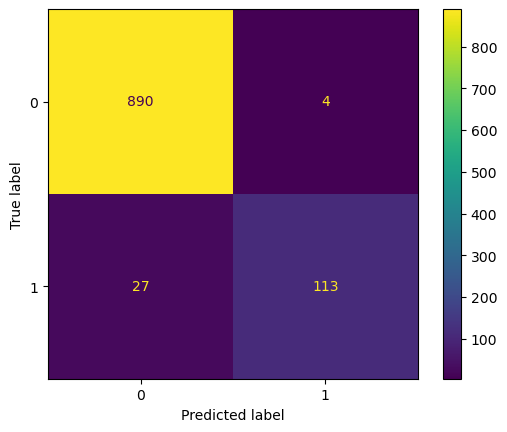

In [46]:
# training the dataset for XGB classifier model
XGB_model.fit(X_train,Y_train)
y_pred1 = XGB_model.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))
conf_mat1 = confusion_matrix(Y_test,y_pred1)
cm_display1 = ConfusionMatrixDisplay(confusion_matrix=conf_mat1,display_labels=[0,1])
cm_display1.plot()
plt.show()

In [47]:
# Evaluating the model
def Evaluation(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    y_prediction = clf.predict(X_test)
    accuracy = accuracy_score(Y_test,y_prediction)
    precision = precision_score(Y_test,y_prediction)
    rec_score = recall_score(Y_test,y_prediction)
    f1_scr = 2*((precision*rec_score)/(precision+rec_score))
    return accuracy, precision, rec_score, f1_scr

In [48]:
# Storing all models as dict
clfs = {
    'KNC' : KNC_model, 
    'MNB': MNB_model, 
    'DT': DT_model, 
    'LR': LR_model, 
    'RF': RF_model, 
    'ABC': ABC_model, 
    'BC': BC_model, 
    'ETC': ETC_model,
    'GBC': GBC_model,
    'XGB': XGB_model,
    'GNM': GNM_model,
    'BNB': BNB_model,
}

In [49]:
# getting all scores of all models
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
datastore = []

for name,clf in clfs.items():
    current_accuracy,current_precision,current_recall_score,current_f1_score = Evaluation(clf,X_train,Y_train,X_test,Y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("recall_score - ",current_recall_score)
    print("f1_score - ",current_f1_score)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall_score)
    f1_scores.append(current_f1_score)
    datastore.append([name,current_accuracy,current_precision,current_recall_score,current_f1_score])
    

For  KNC
Accuracy -  0.9052224371373307
Precision -  1.0
recall_score -  0.3
f1_score -  0.4615384615384615
For  MNB
Accuracy -  0.9729206963249516
Precision -  0.8835616438356164
recall_score -  0.9214285714285714
f1_score -  0.902097902097902
For  DT
Accuracy -  0.9632495164410058
Precision -  0.9636363636363636
recall_score -  0.7571428571428571
f1_score -  0.848
For  LR
Accuracy -  0.9729206963249516
Precision -  0.9912280701754386
recall_score -  0.8071428571428572
f1_score -  0.889763779527559
For  RF
Accuracy -  0.9632495164410058
Precision -  1.0
recall_score -  0.7285714285714285
f1_score -  0.8429752066115702
For  ABC
Accuracy -  0.9632495164410058
Precision -  0.9473684210526315
recall_score -  0.7714285714285715
f1_score -  0.8503937007874016
For  BC
Accuracy -  0.9593810444874274
Precision -  0.9622641509433962
recall_score -  0.7285714285714285
f1_score -  0.8292682926829268
For  ETC
Accuracy -  0.9700193423597679
Precision -  1.0
recall_score -  0.7785714285714286
f1_sco

In [50]:
# sorting each model in the basis of precision
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall_score':recall_scores,'F1_score':f1_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision,Recall_score,F1_score
0,KNC,0.905222,1.000000,0.300000,0.461538
4,RF,0.963250,1.000000,0.728571,0.842975
7,ETC,0.970019,1.000000,0.778571,0.875502
8,GBC,0.955513,1.000000,0.671429,0.803419
3,LR,0.972921,0.991228,0.807143,0.889764
11,BNB,0.969052,0.982143,0.785714,0.873016
9,XGB,0.970019,0.965812,0.807143,0.879377
2,DT,0.963250,0.963636,0.757143,0.848000
6,BC,0.959381,0.962264,0.728571,0.829268
5,ABC,0.963250,0.947368,0.771429,0.850394


<Axes: >

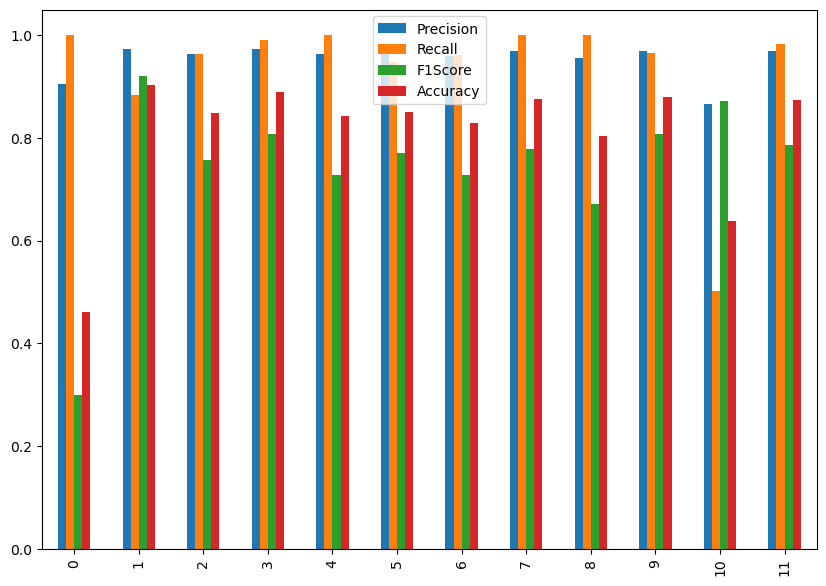

In [51]:
# plotting table to visualize the analysis
table = pd.DataFrame(datastore, columns = ['Classifier_name', 'Precision', "Recall", "F1Score", "Accuracy"]) 
table.plot.bar(figsize = (10,7))

In [52]:
# precision is 1 for SVC,KNC,RF,ETC,GBC models
# now we need to maximize the accuracy
# voting classifier of SVC,KNC,RF,ETC,GBC models


KNC_model = KNeighborsClassifier(n_neighbors = 50)
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 2)
ETC_model = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
GBC_model = GradientBoostingClassifier(n_estimators = 50, random_state = 2)

In [53]:
# creating voting object
# training the model

voting = VotingClassifier(estimators=[('KNC',KNC_model),('RF',RF_model),('ETC',ETC_model),('GBC',GBC_model)],voting ='soft' )
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('KNC', KNeighborsClassifier(n_neighbors=50)),
                             ('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('ETC',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('GBC',
                              GradientBoostingClassifier(n_estimators=50,
                                                         random_state=2))],
                 voting='soft')

In [54]:
# testing the model

y_pred1 = voting.predict(X_test)

# printing the accuracy score and precision score
print('Accuracy score - ',accuracy_score(Y_test,y_pred1))
print('Precision score - ',precision_score(Y_test,y_pred1))

Accuracy score -  0.9448742746615088
Precision score -  1.0


In [55]:
# the accuracy has reduced
# let's try out stacking

estimators=[('KNC',KNC_model),('RF',RF_model),('ETC',ETC_model),('GBC',GBC_model)]

estimator = RandomForestClassifier()

clf1 = StackingClassifier(estimators=estimators , final_estimator=estimator)

In [56]:
# training the model
clf1.fit(X_train,Y_train)
y_pred11 = clf1.predict(X_test)

In [57]:
# printing the scores

print("accuracy score - ",accuracy_score(y_pred11,Y_test))
print("precision_score - ",precision_score(y_pred11,Y_test))

accuracy score -  0.9806576402321083
precision_score -  0.8857142857142857


In [58]:
# precision dropped so can't consider it.
# Finally, ETC is giving the best results, so we will be using the ETC classifier.
# Now we have to host the website, for that pipeline needs to be done
# The text which we will get, has to be transformed first, then vectorized and then apply the algorithm

In [ ]:
# function to convert new text into vector for prediction
vocabulary = set(word for sentence in X for word in sentence)
word_to_idx = {word: idx for idx, word in enumerate(vocabulary)}
def text_to_vector(text):
    vector = np.zeros(len(vocabulary))
    for word in text:
        if word in word_to_idx:
            vector[word_to_idx[word]] += 1
    return vector

# setting up vectorizer for classification
count_vect = CountVectorizer()
ETC_model = ExtraTreesClassifier()

In [60]:
clf_final = Pipeline(steps=[('count_vect',CountVectorizer(),'ETC_model',ExtraTreesClassifier())])

In [74]:
# pickling two files
import pickle
pickle.dump(count_vect,open('vectorizer.pkl','wb'))
pickle.dump(ETC_model,open('model.pkl','wb'))